In [2]:
# Leer el archivo CSV
data <- read.csv("deSeqRes_filtrado_bacillus_subtilis_CW14.csv")
# Filtrar los genes significativos
genes_significativos <- subset(data, padj < 0.05)
# Extraer la lista de genes significativos
lista_genes <- genes_significativos$gene_name
# Verificar si los genes son números (posiblemente IDs de Entrez)
if (all(grepl("^\\d+$", lista_genes))) {
    genes_ids <- lista_genes
} else {
    # Convertir los nombres de genes a IDs de Entrez si son símbolos
    genes_ids <- bitr(lista_genes, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = org.Hs.eg.db)$ENTREZID
}
genes_ids

[1]      5997       133      7124      2353      4576      4572     10769
  [8]    414236      3659      4569      3397      1435      4050    284454
 [15]    780851      1543    389384     10808     27289      3576     10370
 [22]      3311      1437 112268133      2920      4792      6385     64332
 [29]      4556      3627    148022      5328     79094    162989     84981
 [36]      1545      9298      6376      6776 105372652 112268301      7128
 [43] 105373485      1827    283624      4566 105377347      6352      3139
 [50]      2921       624      1844     63943 105374418     85389       330
 [57]      8740      2919     85390 100874246     11080      4555 105378604
 [64] 101928433      6351 107986649      3310    780853      7127      3553
 [71]     83896    407975        12      4568 107075116 105376361 102465879
 [78]      3383 107986119      8013 105373836    693201     92162      4565
 [85]      6373      9935      1440    158257    171523      9001      6367
 [92]    114599     81788     83887    116938     91370 100419583    441307
 [99]     79635 105376360     10747    340719    284185      3337 100130476
[106] 100996511 100616376 100422943     25794    254100     51561    135112
[113]      6274 105372711     26813 105378328      9308      3303 107986170
[120]      8351      4577      6347      2824    441072 105378744     22943
[127] 107984421     26013      3304 101927080 105369161      8676     26816
[134]     65997      2113 100216546 101928741      5724 105374584      6648
[141] 107986197      3626       629    692158      7057     84688    339829
[148]     26817 107987152    340544      6374 105372380      5021 107985080
[155]    677806 101930112      2302 105373944     26330 100126791    677812
[162] 105371159      9299 100505812     85450 101929715 100287216 100506178
[169]      3976    574042 105375181    728378     26770      6344      9297
[176] 105370364     26818 105371413    342977    619569    677811 105376714
[183]     54863    387763 100507489      3552 107985383 105371058 105378911
[190]      6364    677810 105377290      4884     23025 105371600     57172
[197]      9953    594838

BIOGRID

Listado de Organismos en BioGrid

https://webservice.thebiogrid.org/organisms/?accesskey=2a4e2455be91b4c686b17f26b16cdeb9


Para analizar las rutas implicadas en las interacciones proteína-proteína, generalmente se ineteresa más las interacciones físicas. Esto se debe a que las interacciones físicas suelen implicar un contacto directo entre las proteínas, formando complejos proteicos que están directamente involucrados en procesos celulares y biológicos específicos. Estas interacciones son fundamentales para comprender cómo las proteínas cooperan entre sí para llevar a cabo funciones biológicas.

Warning message:
"package 'igraph' was built under R version 4.3.3"

Attaching package: 'igraph'


The following object is masked from 'package:IRanges':

    union


The following object is masked from 'package:S4Vectors':

    union


The following objects are masked from 'package:BiocGenerics':

    normalize, path, union


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




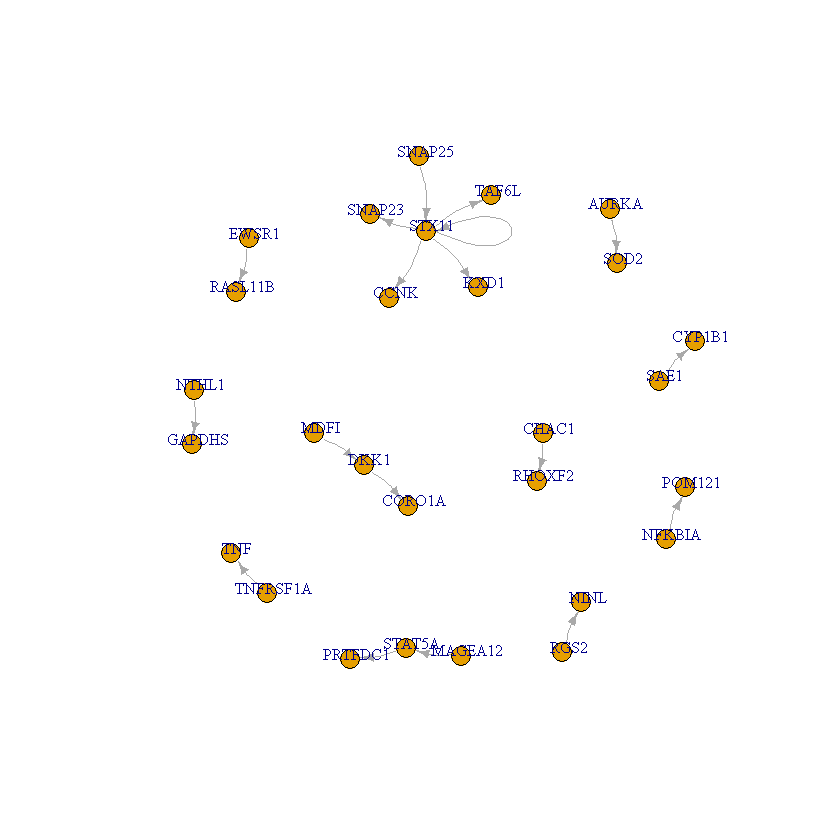

In [7]:
# Especifica la ruta de tu archivo interacciones.txt
file_path <- "interactions.txt"

# Leer el archivo de interacciones
interacciones <- read.table(file_path, sep = "\t", header = FALSE, fill = TRUE)

# Verificar si se leyeron datos válidos
if (length(interacciones) > 0) {
  # Asignar nombres de columnas según la estructura de BioGRID
  col_names <- c("V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10",
                 "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20",
                 "V21", "V22", "V23", "V24")
  
  # Ajustar el vector de nombres si es necesario (puede ser que BioGRID devuelva menos columnas)
  col_names <- head(col_names, ncol(interacciones))
  
  # Asignar nombres de columnas
  colnames(interacciones) <- col_names

  # Verificar si hay filas duplicadas y eliminarlas si es necesario
  interacciones_fisicas <- unique(interacciones)
  
  # Filtrar por interacciones físicas con alta calidad y seleccionar las primeras 10
  interacciones_fisicas <- interacciones[interacciones$V18 != "Low Throughput" & interacciones$V13 == "physical", c("V8", "V9")]
  interacciones_fisicas <- interacciones_fisicas[1:20, ]
  
  
  
  # Crear un grafo dirigido usando igraph
  library(igraph)
  
  # Crear un grafo vacío con los nodos de interacciones únicas
  grafo <- graph_from_data_frame(d = interacciones_fisicas, directed = TRUE)
  
  # Ajustar el layout para evitar superposiciones
  layout <- layout_with_fr(grafo, weights = E(grafo)$weight)
  
  # Visualizar el grafo con un layout personalizado
  plot(grafo, layout = layout, vertex.label.dist = 0.5, vertex.size = 8, edge.arrow.size = 0.5,
       vertex.label.cex = 0.8, edge.curved = 0.2, margin = 0.1)
  
} else {
  # Manejar el caso de que no se hayan leído datos válidos
  print("No se pudieron leer datos válidos.")
}


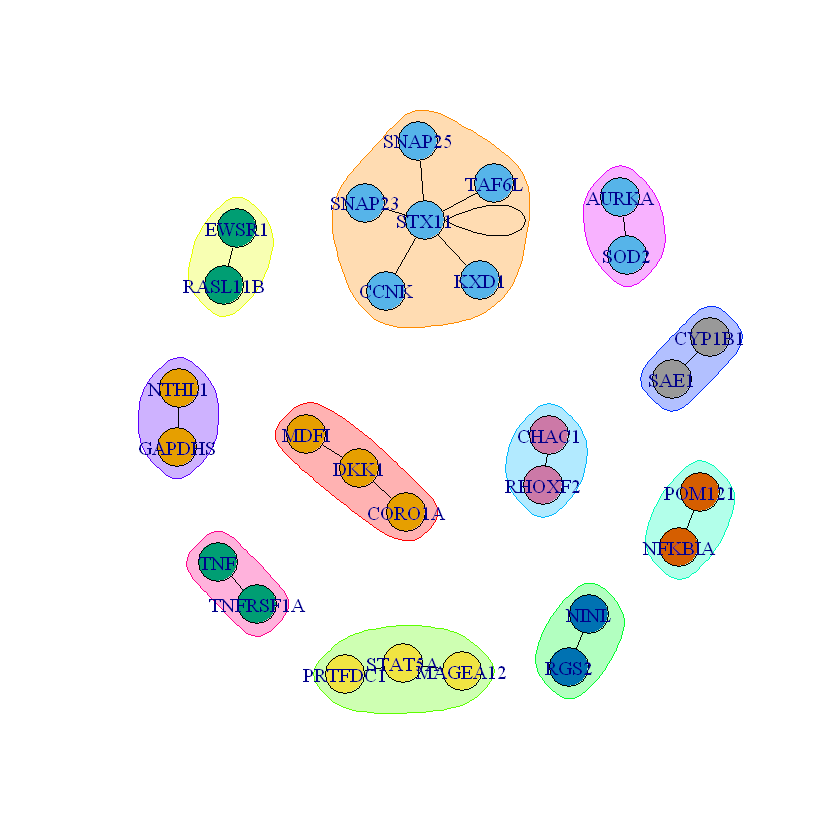

In [8]:
# Convertir el grafo dirigido en no dirigido
grafo_no_dirigido <- as.undirected(grafo, mode = "collapse")
# Detectar comunidades usando el algoritmo de Louvain en el grafo no dirigido
comunidades <- cluster_louvain(grafo_no_dirigido)
plot(comunidades, grafo_no_dirigido, layout = layout)


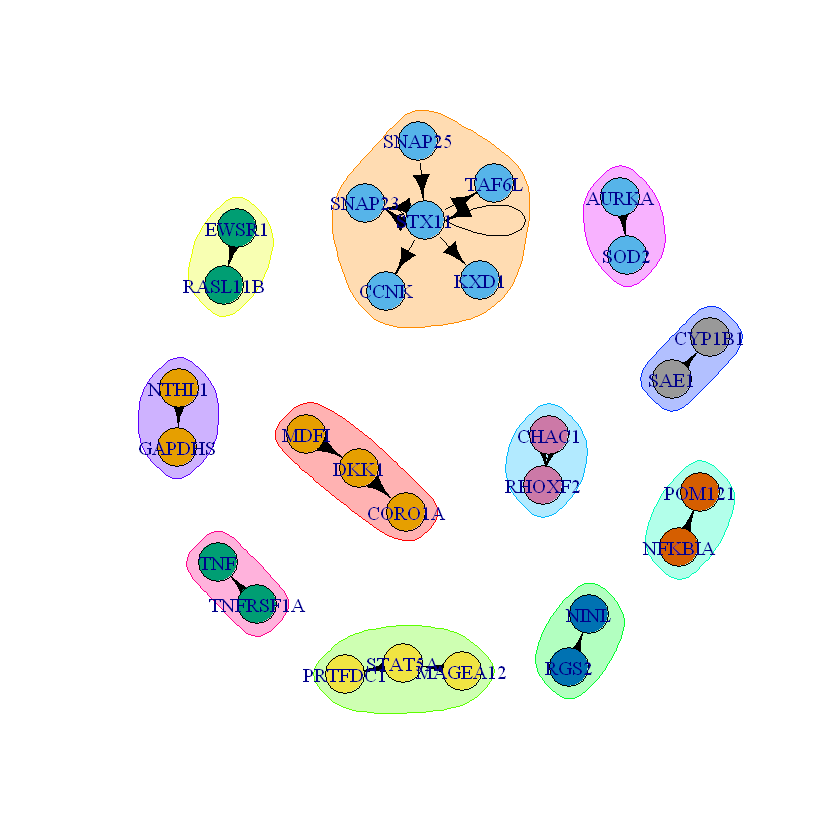

In [9]:
# Detectar comunidades usando el método de propagación de etiquetas en el grafo dirigido
comunidades_label_prop <- cluster_label_prop(grafo, weights = NA)
plot(comunidades_label_prop, grafo, layout = layout)


In [10]:
interacciones_fisicas

,V8,V9
,<chr>,<chr>
20,MDFI,DKK1
21,STX11,TAF6L
22,EWSR1,RASL11B
23,STX11,CCNK
24,SNAP25,STX11
25,STX11,KXD1
26,MAGEA12,STAT5A
27,RGS2,NINL
28,NFKBIA,POM121


In [11]:
# Especifica la ruta de tu archivo interacciones.txt
file_path <- "interactions.txt"

# Leer el archivo de interacciones
interacciones <- read.table(file_path, sep = "\t", header = FALSE, fill = TRUE)
str(interacciones)

'data.frame':	6435 obs. of  24 variables:
 $ V1 : int  1156 8011 8799 10618 10836 16245 17403 18916 20912 20917 ...
 $ V2 : chr  "10370" "9001" "3552" "5970" ...
 $ V3 : int  7020 3064 4692 2353 1616 8887 8573 6776 9001 1639 ...
 $ V4 : int  115649 114480 109768 111902 108414 112983 109623 109921 110833 114480 ...
 $ V5 : int  112878 109314 110772 108636 107985 114405 114141 112653 114480 108007 ...
 $ V6 : chr  "-" "-" "-" "-" ...
 $ V7 : chr  "RP1-290I10.1" "-" "-" "-" ...
 $ V8 : chr  "CITED2" "HAP1" "IL1A" "RELA" ...
 $ V9 : chr  "TFAP2A" "HTT" "NDN" "FOS" ...
 $ V10: chr  "ASD8|MRG-1|MRG1|P35SRJ|VSD2" "HAP2|HIP5|HLP|hHLP1" "IL-1A|IL1|IL1-ALPHA|IL1F1" "NFKB3|p65" ...
 $ V11: chr  "AP-2|AP-2alpha|AP2TF|BOFS|TFAP2" "HD|IT15" "HsT16328|PWCR" "AP-1|C-FOS|p55" ...
 $ V12: chr  "Two-hybrid" "Two-hybrid" "Two-hybrid" "Two-hybrid" ...
 $ V13: chr  "physical" "physical" "physical" "physical" ...
 $ V14: chr  "Braganca J (2003)" "Li XJ (1995)" "Hu B (2003)" "Yang X (1999)" ...
 $ V15: chr  "

In [13]:
# Nombres de las columnas deseadas
nombres_columnas <- c(
  "BioGRID Interaction ID", 
  "Entrez Gene ID for Interactor A", 
  "Entrez Gene ID for Interactor B", 
  "BioGRID ID for Interactor A", 
  "BioGRID ID for Interactor B", 
  "Systematic name for Interactor A", 
  "Systematic name for Interactor B", 
  "Official symbol for Interactor A", 
  "Official symbol for Interactor B", 
  "Synonyms/Aliases for Interactor A", 
  "Synonyms/Aliases for Interactor B", 
  "Experimental System Name", 
  "Experimental System Type", 
  "First author surname of the publication", 
  "Pubmed ID", 
  "Organism ID for Interactor A", 
  "Organism ID for Interactor B", 
  "Interaction Throughput", 
  "Quantitative Score", 
  "Post Translational Modification", 
  "Phenotypes", 
  "Qualifications", 
  "Tags", 
  "Source Database"
)

# Asignar los nuevos nombres de columnas al DataFrame
colnames(interacciones) <- nombres_columnas

# Verificar la estructura del DataFrame con los nuevos nombres
str(interacciones)


'data.frame':	6435 obs. of  24 variables:
 $ BioGRID Interaction ID                 : int  1156 8011 8799 10618 10836 16245 17403 18916 20912 20917 ...
 $ Entrez Gene ID for Interactor A        : chr  "10370" "9001" "3552" "5970" ...
 $ Entrez Gene ID for Interactor B        : int  7020 3064 4692 2353 1616 8887 8573 6776 9001 1639 ...
 $ BioGRID ID for Interactor A            : int  115649 114480 109768 111902 108414 112983 109623 109921 110833 114480 ...
 $ BioGRID ID for Interactor B            : int  112878 109314 110772 108636 107985 114405 114141 112653 114480 108007 ...
 $ Systematic name for Interactor A       : chr  "-" "-" "-" "-" ...
 $ Systematic name for Interactor B       : chr  "RP1-290I10.1" "-" "-" "-" ...
 $ Official symbol for Interactor A       : chr  "CITED2" "HAP1" "IL1A" "RELA" ...
 $ Official symbol for Interactor B       : chr  "TFAP2A" "HTT" "NDN" "FOS" ...
 $ Synonyms/Aliases for Interactor A      : chr  "ASD8|MRG-1|MRG1|P35SRJ|VSD2" "HAP2|HIP5|HLP|hHLP1" "IL-

Hay interacciones con otros organismos además de 9606->Homo Sapiens?

In [14]:
# Filtrar los organismos distintos de 9606 en la columna "Organism ID for Interactor A"
organismos_A_distintos <- unique(interacciones$`Organism ID for Interactor A`[interacciones$`Organism ID for Interactor A` != 9606])

# Filtrar los organismos distintos de 9606 en la columna "Organism ID for Interactor B"
organismos_B_distintos <- unique(interacciones$`Organism ID for Interactor B`[interacciones$`Organism ID for Interactor B` != 9606])

# Mostrar los resultados
organismos_A_distintos
organismos_B_distintos


[1] "10090"   "9913"    "10116"   "11676"   "BIOGRID" "9986"    "37296"  
 [8] "559292"  "333760"  "2697049" "1335626" "10600"   "7227"    "9823"

[1] 10090  9913 10116 11676    NA  9031

Se encontraron interacciones con estos organismos además de 9606 -> Homo sapiens:

    10116 -> Rattus norvegicus

    10090 -> Mus musculus

    9913 -> Bos taurus

    11676 -> Human Immunodeficiency Virus 1

    9986 -> Oryctolagus cuniculus

    37296 -> Human Herpesvirus 8

    559292 -> Saccharomyces cerevisiae (S288c)

    333760 -> Human papillomavirus (16)

    2697049 -> Severe acute respiratory syndrome coronavirus 2

    1335626 -> Middle-East Respiratory Syndrome-related Coronavirus

    6239 -> Caenorhabditis elegans

    10600 -> Human papillomavirus (6b)

    7227 -> Drosophila melanogaster

    9823 -> Sus scrofa
    
    9031 -> Gallus gallus

    

In [17]:
# Crear un diccionario que asocie cada Organism ID con su nombre correspondiente
organism_names <- c(
  "9606" = "Homo sapiens",
  "10116" = "Rattus norvegicus",
  "10090" = "Mus musculus",
  "9913" = "Bos taurus",
  "11676" = "Human Immunodeficiency Virus 1",
  "9986" = "Oryctolagus cuniculus",
  "37296" = "Human Herpesvirus 8",
  "559292" = "Saccharomyces cerevisiae (S288c)",
  "333760" = "Human papillomavirus (16)",
  "2697049" = "Severe acute respiratory syndrome coronavirus 2",
  "1335626" = "Middle-East Respiratory Syndrome-related Coronavirus",
  "6239" = "Caenorhabditis elegans",
  "10600" = "Human papillomavirus (6b)",
  "7227" = "Drosophila melanogaster",
  "9823" = "Sus scrofa",
  "9031" = "Gallus gallus"
)

# Reemplazar los valores numéricos con los nombres en la columna "Organism ID for Interactor A"
interacciones$`Organism ID for Interactor A` <- organism_names[as.character(interacciones$`Organism ID for Interactor A`)]

# Reemplazar los valores numéricos con los nombres en la columna "Organism ID for Interactor B"
interacciones$`Organism ID for Interactor B` <- organism_names[as.character(interacciones$`Organism ID for Interactor B`)]

# Verificar el resultado
head(interacciones$`Organism ID for Interactor A`)
head(interacciones$`Organism ID for Interactor B`)


[1] "Homo sapiens" "Homo sapiens" "Homo sapiens" "Homo sapiens" "Homo sapiens"
[6] "Homo sapiens"

[1] "Homo sapiens" "Homo sapiens" "Homo sapiens" "Homo sapiens" "Homo sapiens"
[6] "Homo sapiens"

https://wiki.thebiogrid.org/doku.php/biogrid_tab_version_2.0
Header Definitions
The first line of a BioGRID Tab 2.0 file is the heading line and starts with a hash (#). This line is purely for informational purposes and gives a brief description of the content contained in each column. If you are scripting the use of this file, you can simply ignore it.

Interaction File Column Definitions
The column contents of BioGRID Interaction Tab 2.0 files should be as follows:

BioGRID Interaction ID. A unique identifier for each interaction within the BioGRID database. Can be used to link to BioGRID interaction pages. For example: http://thebiogrid.org/interaction/616539
-Entrez Gene ID for Interactor A. The identifier from the Entrez-Gene database that corresponds to Interactor A. If no Entrez Gene ID is available, this will be a “-”.
-Entrez Gene ID for Interactor B. Same structure as column 2.
BioGRID ID for Interactor A. The identifier in the BioGRID database that corresponds to Interactor A. These identifiers are best used for creating links to the BioGRID from your own websites or applications. To link to a page within our site, simply append the URL: http://thebiogrid.org/ID/ to each ID. For example, http://thebiogrid.org/31623/.
BioGRID ID for Interactor B. Same structure as column 4.
Systematic name for Interactor A. A plain text systematic name if known for interactor A. Will be a “-” if no name is available.
Systematic name for Interactor B. Same structure as column 6.
Official symbol for Interactor A. A common gene name/official symbol for interactor A. Will be a “-” if no name is available.
Official symbol for Interactor B. Same structure as column 8.
Synonyms/Aliases for Interactor A. A “|” separated list of alternate identifiers for interactor A. Will be “-” if no aliases are available.
Synonyms/Aliases for Interactor B. Same stucture as column 10.
Experimental System Name. One of the many Experimental Evidence Codes supported by the BioGRID.
Experimental System Type. This will be either “physical” or “genetic” as a classification of the Experimental System Name.
First author surname of the publication in which the interaction has been shown, optionally followed by additional indicators, e.g. Stephenson A (2005)
Pubmed ID of the publication in which the interaction has been shown.
Organism ID for Interactor A. This is the NCBI Taxonomy ID for Interactor A.
Organism ID for Interactor B. Same structure as 16.
Interaction Throughput. This will be either High Throughput, Low Throughput or Both (separated by “|”).
Quantitative Score. This will be a positive for negative value recorded by the original publication depicting P-Values, Confidence Score, SGA Score, etc. Will be “-” if no score is reported.
Post Translational Modification. For any Biochemical Activity experiments, this field will be filled with the associated post translational modification. Will be “-” if no modification is reported.
Phenotypes. If any phenotype info is recorded, it will be provided here separated by “|”. Each phenotype will be of the format <phenotype>[<phenotype qualifier>]:<phenotype type>. Note that the phenotype types and qualifiers are optional and will only be present where recorded. Phenotypes may also have multiple qualifiers in which case unique qualifiers will be separated by carat (^). If no phenotype information is available, this field will contain “-”.
Qualifications. If additional plain text information was recorded for an interaction, it will be listed with unique qualifiers separated by “|”. If no qualification is available, this field will contain “-”.
Tags. If an interaction has been tagged with additional classifications, they will be provided in this column separated by “|”. If no tag information is available, this field will contain “-”.
Source Database. This field will contain the name of the database in which this interaction was provided.
All columns are mandatory so columns with no values are filled with “-“

Esta fue el query que se uso:

In [12]:
print(query_url)

[1] "http://webservice.thebiogrid.org/interactions?geneList=5997|133|7124|2353|4576|4572|10769|414236|3659|4569|3397|1435|4050|284454|780851|1543|389384|10808|27289|3576|10370|3311|1437|112268133|2920|4792|6385|64332|4556|3627|148022|5328|79094|162989|84981|1545|9298|6376|6776|105372652|112268301|7128|105373485|1827|283624|4566|105377347|6352|3139|2921|624|1844|63943|105374418|85389|330|8740|2919|85390|100874246|11080|4555|105378604|101928433|6351|107986649|3310|780853|7127|3553|83896|407975|12|4568|107075116|105376361|102465879|3383|107986119|8013|105373836|693201|92162|4565|6373|9935|1440|158257|171523|9001|6367|114599|81788|83887|116938|91370|100419583|441307|79635|105376360|10747|340719|284185|3337|100130476|100996511|100616376|100422943|25794|254100|51561|135112|6274|105372711|26813|105378328|9308|3303|107986170|8351|4577|6347|2824|441072|105378744|22943|107984421|26013|3304|101927080|105369161|8676|26816|65997|2113|100216546|101928741|5724|105374584|6648|107986197|3626|629|692158

In [18]:
# Guardar la lista de proteínas en un archivo CSV
write.csv(interacciones, file = "interacciones_BioGRID_Bacillus_Subtilis.csv", row.names = FALSE)